Analyzing ratio deviations...

Departure temperature: T = 0.0124 MeV


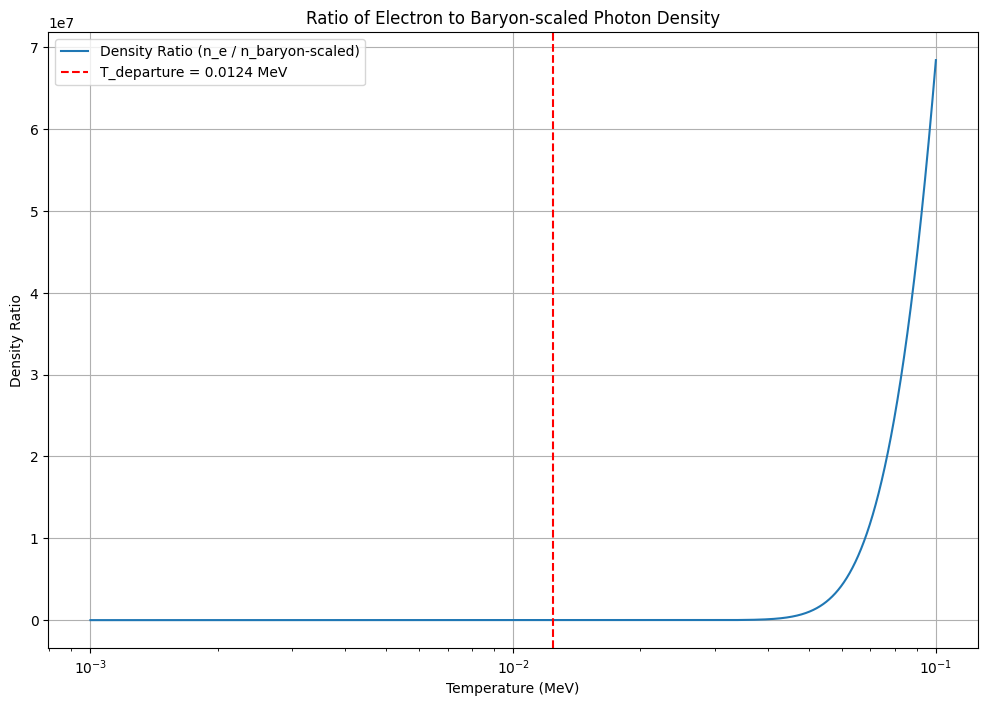

In [29]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Constants
m_e = 0.511  # Electron mass in MeV
eta_b = 6e-10  # Baryon-to-photon ratio
hbar = 6.582119569 * 10**(-19)

def integrand_number_density(p, T, m=m_e):
    """Integrand for electron number density."""
    return 8 * np.pi * (p**2 / (np.exp(np.sqrt(m**2 + p**2) / T) + 1))

def photon_number_density(T):
    """Analytical photon number density."""
    return (2 * 1.20205 / np.pi**2) * T**3 / hbar**3

def electron_number_density(T):
    """Compute the numerical integral for the electron number density."""
    upper_limit = 100 * T  # Adaptive upper limit based on temperature
    integral, _ = integrate.quad(
        integrand_number_density, 
        0, 
        upper_limit, 
        args=(T,),
        limit=10000
    )
    return integral * 8 * np.pi / ((2* np.pi**2 * hbar)**3)  # Normalize by phase-space factor

def find_ratio_deviation(T_range):
    """
    Calculates the ratio of electron number density to baryon-scaled photon density
    and finds the temperature where the ratio starts to deviate significantly.
    """
    temperatures = np.geomspace(T_range[0], T_range[1], 10000)
    ratios = []

    for T in temperatures:
        n_e = electron_number_density(T)
        n_baryon_scaled = eta_b * photon_number_density(T)
        ratios.append(n_e / n_baryon_scaled)

    # Find where the ratio deviates significantly
    ratios = np.array(ratios)
    deviations = np.abs(np.gradient(ratios, np.log(temperatures)))
    deviation_threshold = 1e-5  # Define a threshold for significant change
    index_of_departure = np.argmax(deviations > deviation_threshold)

    return temperatures[index_of_departure], temperatures, ratios

def plot_ratios(T_departure, temperatures, ratios):
    """
    Plots the ratio of electron number density to baryon-scaled photon density
    and marks the departure temperature.
    """
    plt.figure(figsize=(12, 8))
    plt.plot(temperatures, ratios, label='Density Ratio (n_e / n_baryon-scaled)')
    plt.axvline(x=T_departure, color='r', linestyle='--', label=f'T_departure = {T_departure:.4f} MeV')
    plt.xscale('log')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Density Ratio')
    plt.title('Ratio of Electron to Baryon-scaled Photon Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    T_range = (0.001, 0.1)  # Temperature range in MeV
    print("Analyzing ratio deviations...\n")
    T_departure, temperatures, ratios = find_ratio_deviation(T_range)
    print(f"Departure temperature: T = {T_departure:.4f} MeV")
    plot_ratios(T_departure, temperatures, ratios)